In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/MinhGioChai/Data-Visualization/raw/refs/heads/main/raw_data/train.csv')

Những cột cần xử lí

In [3]:
non_pred_cols= ['TARGET','ID',]
categorical_cols = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START']
amount_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START']
cus_credit_cols= non_pred_cols + categorical_cols + amount_cols
df_prep = df[cus_credit_cols]


In [4]:
df_prep.describe()

,TARGET,ID,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START
count,215258.000000,215258.00000,2.152580e+05,2.152580e+05,215249.000000,2.150840e+05,215258.000000
mean,0.080731,107628.50000,1.688900e+05,5.994893e+05,27125.796166,5.387622e+05,12.064764
std,0.272422,62139.77646,2.745586e+05,4.027798e+05,14531.196505,3.698069e+05,3.264871
min,0.000000,0.00000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000000
25%,0.000000,53814.25000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,10.000000
50%,0.000000,107628.50000,1.440000e+05,5.135310e+05,24925.500000,4.500000e+05,12.000000
75%,0.000000,161442.75000,2.025000e+05,8.086500e+05,34636.500000,6.795000e+05,14.000000
max,1.000000,215257.00000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,23.000000


In [5]:
for col in cus_credit_cols:
    print(f'\n -----Tổng giá trị của biến: {df_prep[col].value_counts(ascending = False)}')
    


 -----Tổng giá trị của biến: TARGET
0    197880
1     17378
Name: count, dtype: int64

 -----Tổng giá trị của biến: ID
196348    1
57538     1
104849    1
26395     1
159713    1
         ..
136545    1
207150    1
41575     1
32747     1
121958    1
Name: count, Length: 215258, dtype: int64

 -----Tổng giá trị của biến: NAME_CONTRACT_TYPE
Cash loans         194860
Revolving loans     20398
Name: count, dtype: int64

 -----Tổng giá trị của biến: NAME_TYPE_SUITE
Unaccompanied      173985
Family              28107
Spouse, partner      7983
Children             2312
Other_B              1190
Other_A               605
Group of people       194
Name: count, dtype: int64

 -----Tổng giá trị của biến: WEEKDAY_APPR_PROCESS_START
TUESDAY      37724
WEDNESDAY    36270
MONDAY       35566
THURSDAY     35443
FRIDAY       35239
SATURDAY     23737
SUNDAY       11279
Name: count, dtype: int64

 -----Tổng giá trị của biến: AMT_INCOME_TOTAL
135000.0    25090
112500.0    21743
157500.0    18592
180000.0

# **STEP 1: DATA UNDERSTANDING**

## **I. DATA DESCRIPTION**

#### **A. Identification and Target Variables**

##### **`ID`:**
This is the primary key for data management. In practice, the ID allows the bank to link this single loan application record with the customer’s entire historical ecosystem (e.g., credit bureau reports, past transactions, family details), ensuring data integrity across different systems.(100% unique value)

##### **`TARGET`:**
This represents the bank's official Default Definition. It signifies the risk event the institution aims to predict and mitigate. Accurately predicting the TARGET helps the bank optimize the approval process:
* Approve potential TARGET=0 applicants 
* Reject potential TARGET=1 applicants, thus protecting profitability.

#### **B. Loan and Product Description Variables**

##### **`NAME_CONTRACT_TYPE`(Loan account type):**
This variable immediately segregates risk by product type.
* Cash Loans generally carry higher risk because the purpose of use is flexible and not tightly controlled by the bank (e.g., used for speculation or non-essential spending).
* Revolving Loans may have lower immediate default rates but carry a risk of perpetual debt (customers repeatedly paying only the minimum due).

##### **`AMT_CREDIT`(Approved loan amount):**

Reflects the bank's Exposure at Default. This is the actual amount of capital the bank stands to lose if the customer defaults. It is used to determine the customer’s Loan Cap based on the bank's internal risk tolerance and regulatory requirements.

##### **`AMT_ANNUITY`(Monthly installment amount):**

A crucial component for calculating Affordability. Banks use this amount to ensure the required monthly repayment fits within the customer's financial capacity, primarily gauged through the Debt-to-Income Ratio (DTI). A high Annuity relative to income signals high financial stress.

##### **`AMT_GOODS_PRICE`(Value of the item):**

If the loan is tied to an asset purchase, this indicates the Loan Purpose and the Value of the Collateral (if secured). It helps underwriters assess the reasonableness of the approved loan amount ($AMT\_CREDIT$) compared to the underlying asset's value.

#### **C. Financial, Social, and Temporal Variables**

##### **`AMT_INCOME_TOTAL`(Total monthly income):**

The main indicator of the Repayment Source. High and stable income is the most fundamental factor for loan approval. Banks use income to calculate the customer's Leverage Ratio ($AMT\_CREDIT / AMT\_INCOME\_TOTAL$), which is key to assessing over-indebtedness.

##### **`NAME_TYPE_SUITE`(Accompanying person when submitting application):**

Provides a proxy for the customer's Social Support Network. An applicant accompanied by family or a spouse may be viewed as having a better emotional or financial safety net during periods of financial difficulty, potentially acting as a minor risk mitigator.
##### **`WEEKDAY_APPR_PROCESS_START`(Application submission date):**

Primarily used for bank operational analysis (e.g., peak application days). Its predictive power is usually low, but it can occasionally capture minor behavioral patterns.

##### **`HOUR_APPR_PROCESS_START`(Application submission time):**

A subtle behavioral risk indicator. Applications submitted at "non-standard hours" (very early or late) can signal financial urgency or an unstable work schedule (e.g., shift work or high job instability). It helps the risk model capture hidden risk patterns linked to lifestyle stability.



## **II. DATA DISTRIBUTION ANALYSIS**

### **1. Target feature**

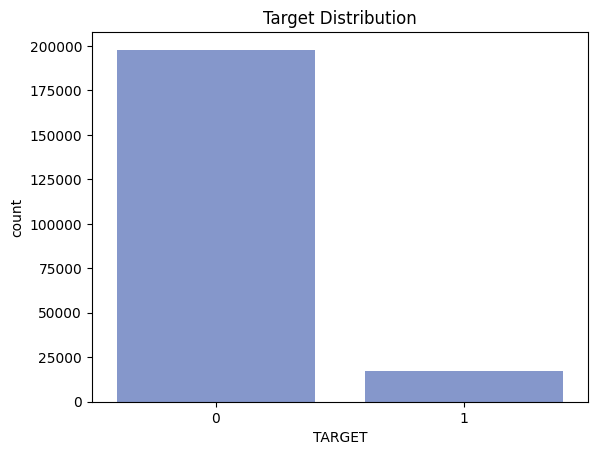

In [6]:
sns.countplot(data=df_prep, x='TARGET', color = "#7A92D6" )
plt.title("Target Distribution")
plt.show()

`ID is unique value(100%) -> No meaningful distribution`

### **2. Categorical features**

In [7]:
import sys
sys.path.append(r'C:\Users\DELL\Data-Visualization\processing')
from function import * 

#### **2.1 Nominal variables**

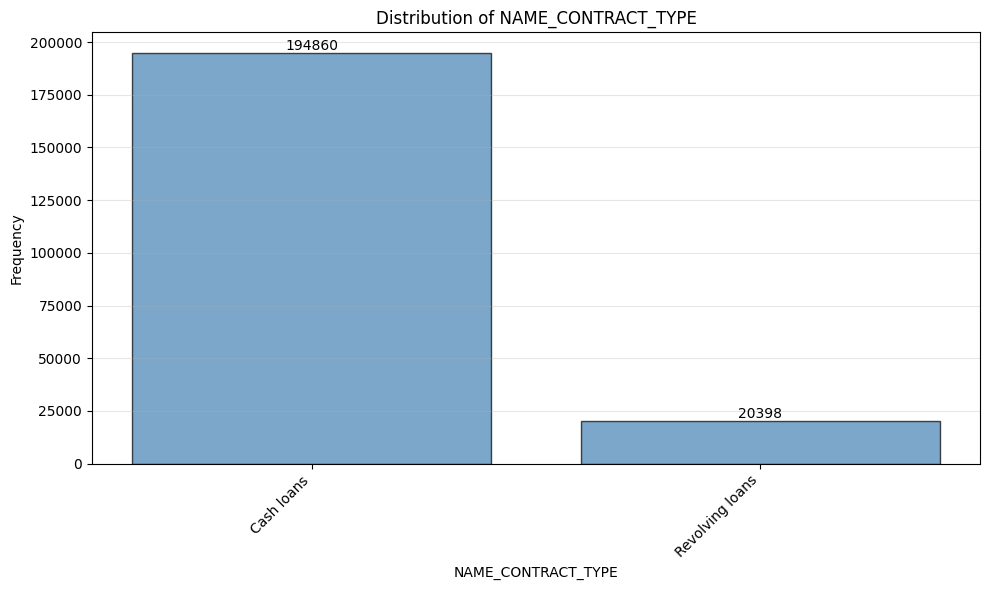

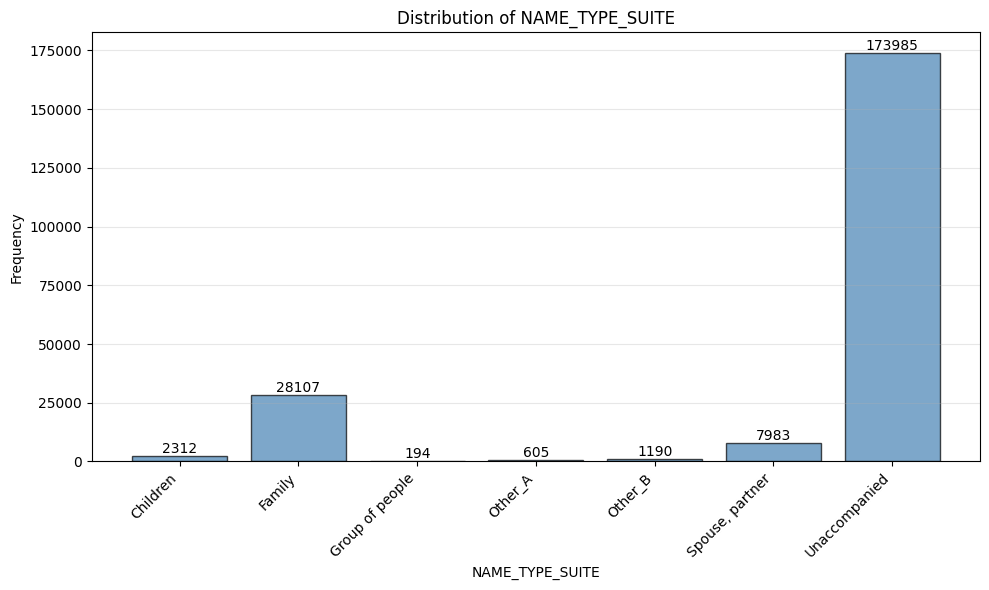

In [8]:
#DISTRIBUTION OF NOMINAL CATEGORICAL FEATURES
cat_cols = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE']

for col in cat_cols:
    plot_discrete_barchart(df_prep[col], 
                           title=f"Distribution of {col}")

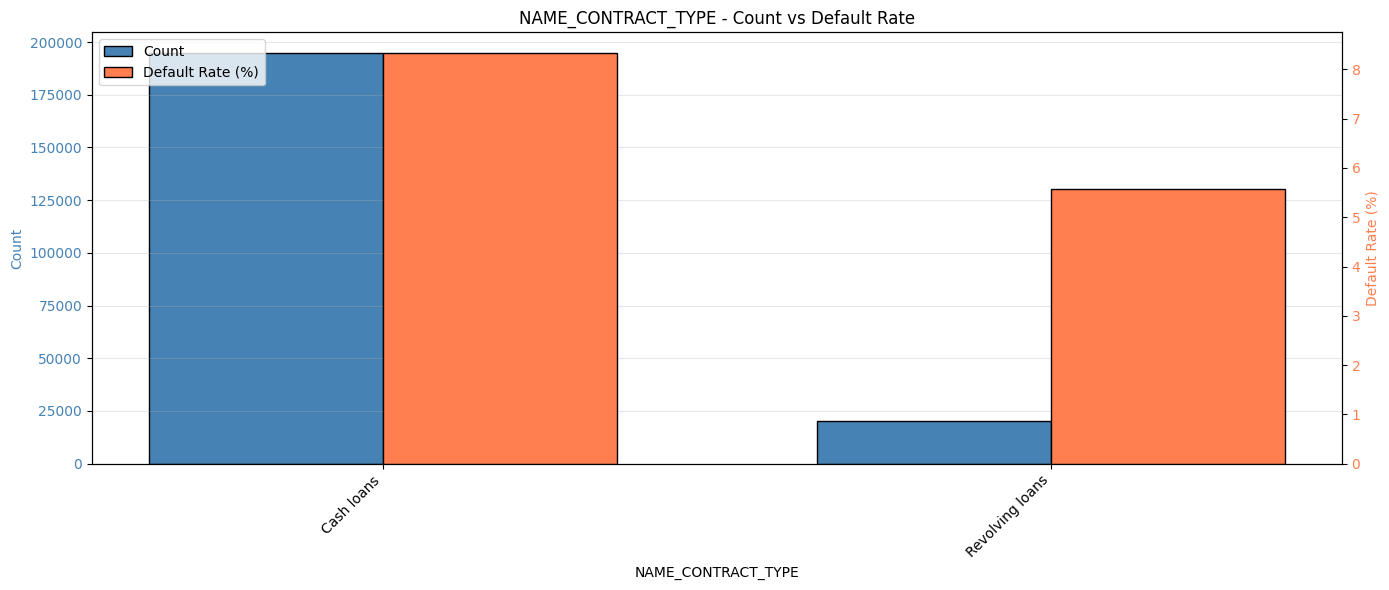

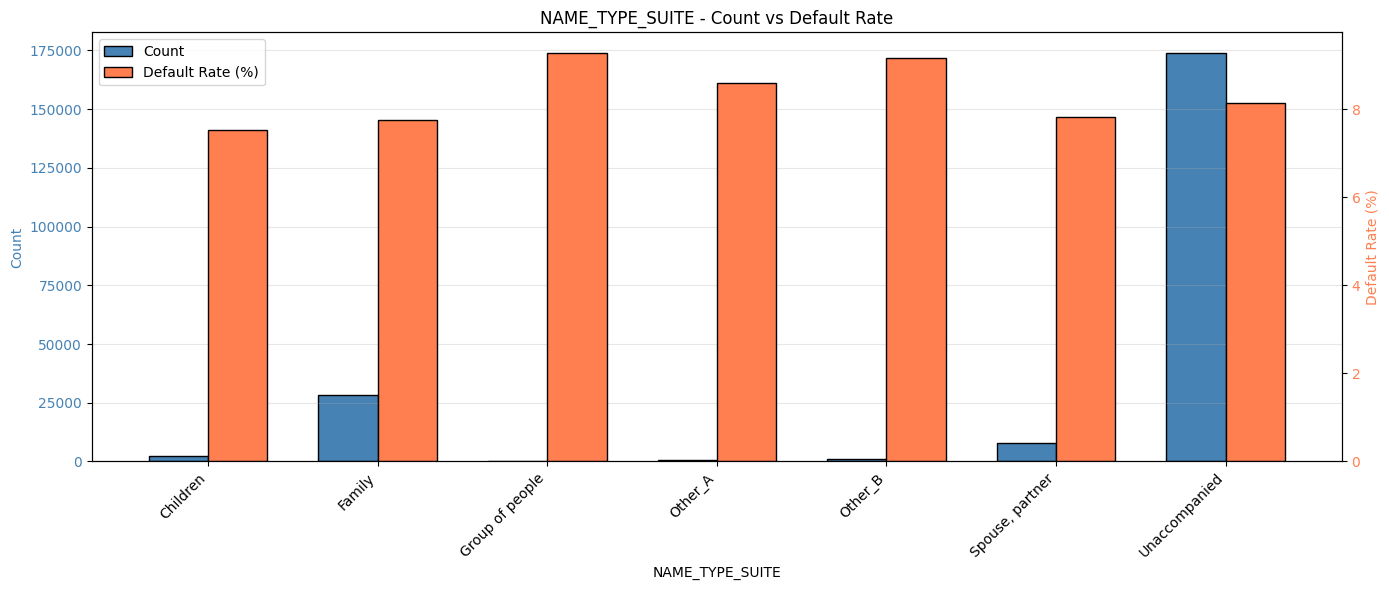

In [9]:
# DISTRIBUTION OF NOMINAL CATEGORICAL FEATURES VS TARGET
for col in cat_cols:
    plot_grouped_bar_vs_target(df_prep, feature=col, target='TARGET')

In [10]:
#METRICS CATEGORICAL VARIABLES VS TARGET
results1 = [] 

for col in cat_cols:
    df_metrics = calculate_target_relationship_nominal(
        data=df_prep,    # DataFrame đầy đủ
        feature=col,     # tên cột categorical
        target='TARGET'  # tên cột target, là string
    )
    results1.append(df_metrics)

# Gộp tất cả metrics lại
categorical_metrics_df = pd.concat(results1, ignore_index=True)
categorical_metrics_df


,Feature,Unique_Values,Chi2_Statistic,Chi2_P_Value,Cramers_V,Information_Value,Mutual_Information
0,NAME_CONTRACT_TYPE,2,189.991678,3.192622e-43,0.029709,0.013827,0.000487
1,NAME_TYPE_SUITE,7,9.482746,1.481933e-01,0.006651,0.000590,0.000022


#### **`NAME_CONTRACT_TYPE` :**

**1. Frequency Distribution** 

* Cash loans: Dominating with 194,860 contracts.

* Revolving loans: Only 20,398 contracts.

=> Impact: This imbalance shows that Cash loans are the main, most popular product of the lending institution in this data set.

**2. Default Rate**

* Cash loans: Have a lower default rate (around 8%)

* Revolving loans: Have a significantly higher default rate (around 12.5%)

Although cash loans are nearly 10 times larger in number, their default rate is significantly lower than revolving loans.Revolving loans (usually credit cards or lines of credit) have a higher potential risk per customer than traditional cash loans, possibly due to their more flexible use or different underwriting processes.

**3. Impact on modeling**

Relevance and Statistical Significance:

* This variable is strongly statistically significant (P-Value is very small).

* Should be retained in the model.
Weak Predictor:

* Low IV ($0.013827$), classified as Weak Predictor.

* Not a major determinant of overall model performance.

Model Impact:

* Tree Model: Easily leverage this difference to create an efficient classification rule.

* Linear Model: Will use a coefficient to adjust the default probability, reflecting the higher risk of the revolving loan.

In summary, although a weak predictor, NAME_CONTRACT_TYPE is a necessary feature because it is structural and should be retained (after coding) to provide the model with information about the type of product and its underlying risk.

#### **`NAME_TYPE_SUITE` :**

**1. Frequency Distribution** 

* Dominant Group: Unaccompanied (Unaccompanied) accounts for the vast majority with 173,995 contracts. 
* Family: The second largest group, but only has 28,107 contracts.

* Spouse, partner: Has 7,983 contracts.

* The remaining groups: Including Children, Group of people, Other_A, and Other_B all have very low frequencies (under 3,000 contracts).

=> This confirms that independent application is the most popular method at the lending institution.

**2. Default Rate**

*  Risk Stratification: Applicants who are accompanied by others (especially Family and Group of people) tend to exhibit higher default rates than the Unaccompanied group (base risk).

* High Risk Group: The Family group (28,107 contracts) is the second largest group but has a significantly higher default rate than the Unaccompanied group.

=> Having someone accompanying the applicant, especially a relative, appears to be associated with a higher level of risk for the loan.

**3. Impact on modeling**

* This variable is statistically significant (very small P-Value).

* Extremely low IV ($0.000590$), classified as a Very Weakest Predictor.

Model Impact:

* Groups with very low frequencies (Group of people, Other_A, Other_B, Children, Spouse, partner) should be grouped into one "Other" group or treated with Target Encoding to avoid instability due to small sample sizes.

* The model needs to learn the small risk difference between the Unaccompanied group (base risk) and the Family group (higher risk).

Summary: The variable NAME_TYPE_SUITE is an extremely weak predictor but gives insight that traveling with others (especially Family) is associated with slightly higher risk. Minority groups (Binning/Grouping) should be treated before entering the model.

#### **2.2 Ordinal variables**

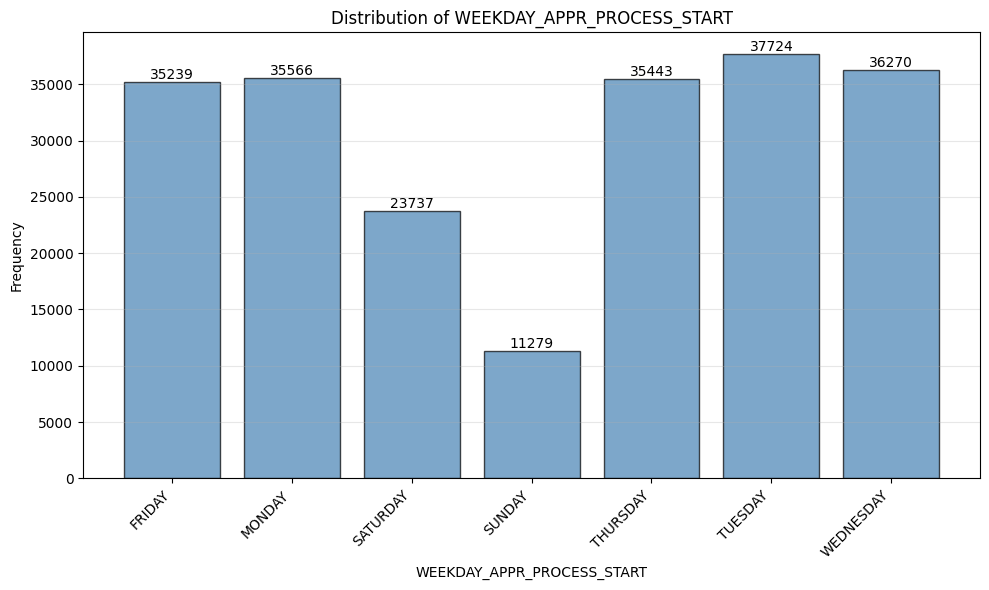

In [11]:

plot_discrete_barchart(df_prep['WEEKDAY_APPR_PROCESS_START'], 
                           title=f"Distribution of WEEKDAY_APPR_PROCESS_START")

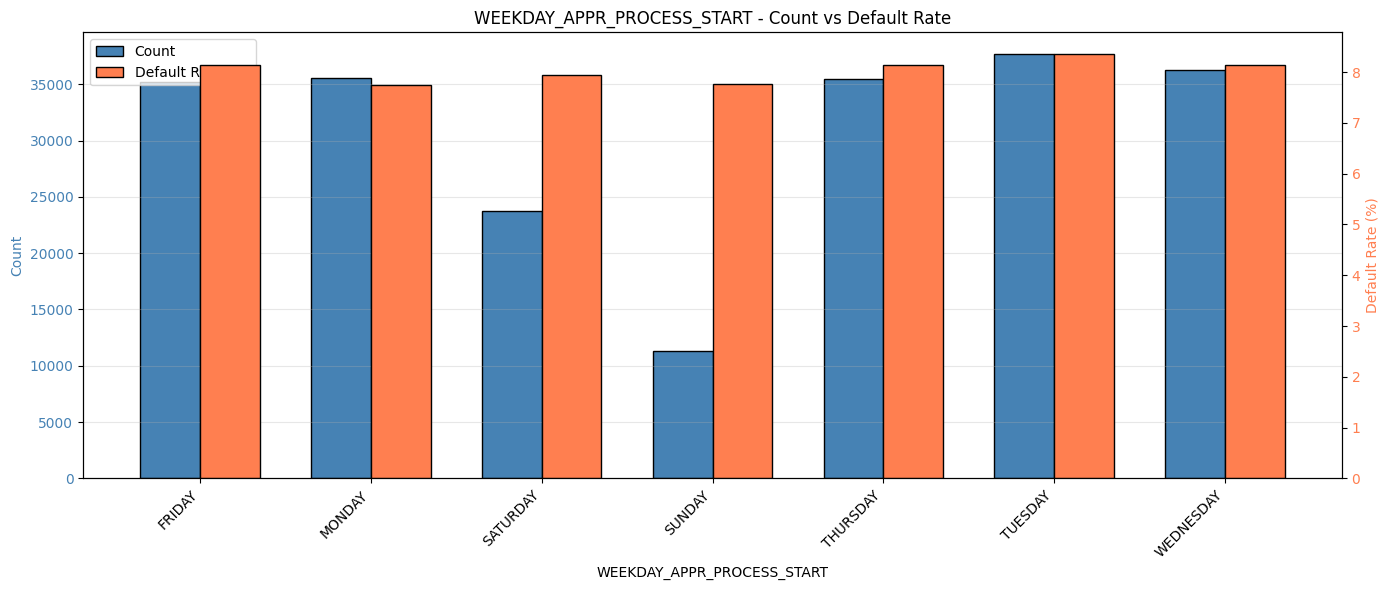

In [12]:
plot_grouped_bar_vs_target(df_prep, feature='WEEKDAY_APPR_PROCESS_START', target='TARGET')

In [13]:
results2 = []

df2_metrics = calculate_target_relationship_ordinal(
    data=df_prep,                           
    feature='WEEKDAY_APPR_PROCESS_START',      
    target='TARGET'                            
)
results2.append(df2_metrics)

# Gộp lại thành 1 DataFrame
ordinal_metrics_df = pd.concat(results2, ignore_index=True)
ordinal_metrics_df


,Feature,Spearman_Correlation,Spearman_P_Value,Point_Biserial_Correlation,Point_Biserial_P_Value
0,WEEKDAY_APPR_PROCESS_START,0.003832,0.075449,0.004085,0.058054


#### **`WEEKDAY_APPR_PROCESS_START` :**

**1. Frequency Distribution** 

* Busiest day: Tuesday has the highest number of applications processed (37,724).

* Average busy day: The remaining days of the week (Monday, Wednesday, Thursday, Friday) have a similar frequency, fluctuating around 35,000 - 36,000 applications.

* Least busy day: Saturday (23,737 applications) and especially Sunday (11,279 applications) have significantly lower processing numbers.

=> Insight: Application processing drops off sharply on weekends, especially Sundays, indicating that the lender operates mainly during business hours on weekdays.

**2. Default Rate**

*  Uniformity: The default rate for all days of the week is very uniform, hovering around $\approx 8\%$

* Days with Higher Rates: Although the difference is small, Saturdays and Sundays appear to have slightly higher default rates than other business days.

=> Risk Insight: The day the application is processed is not a strong risk differentiator. The difference in default rates between days of the week is very small.

**3. Impact on modeling**

Relevance and Statistical Significance:

* The P-Values ($0.075$ and $0.058$) are both greater than $0.05$. 

-> This means that, according to monotonic/linear correlation analysis, the variable does not have a statistically significant relationship with the default probability.

Weak/Non-Predictor:Both correlation coefficients are very close to zero, confirming that this variable has extremely low predictive power (practically none).

Model Impact:Due to its very weak relationship and lack of clear statistical significance (based on these correlation tests), the WEEKDAY_APPR_PROCESS_START variable can be considered for removal during the Feature Selection process. Eliminating it will simplify the model without sacrificing predictive performance.

=> In summary: This variable primarily provides insight into the institution's internal operations (workload reduction on weekends) but offers little to no valuable predictive information regarding customer default risk.

### **3. Numerical features**

#### **3.1 Continuos variance**

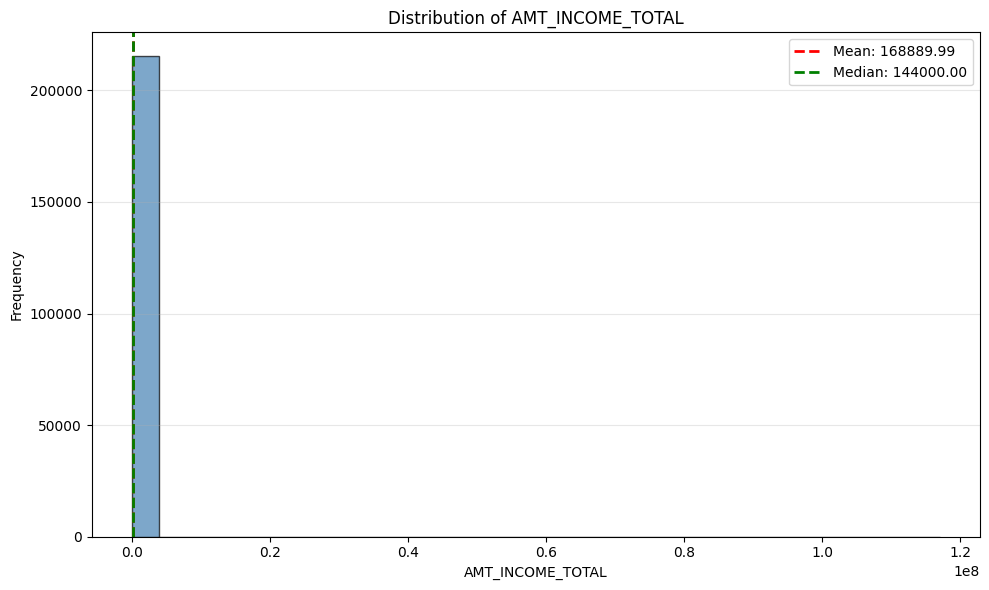

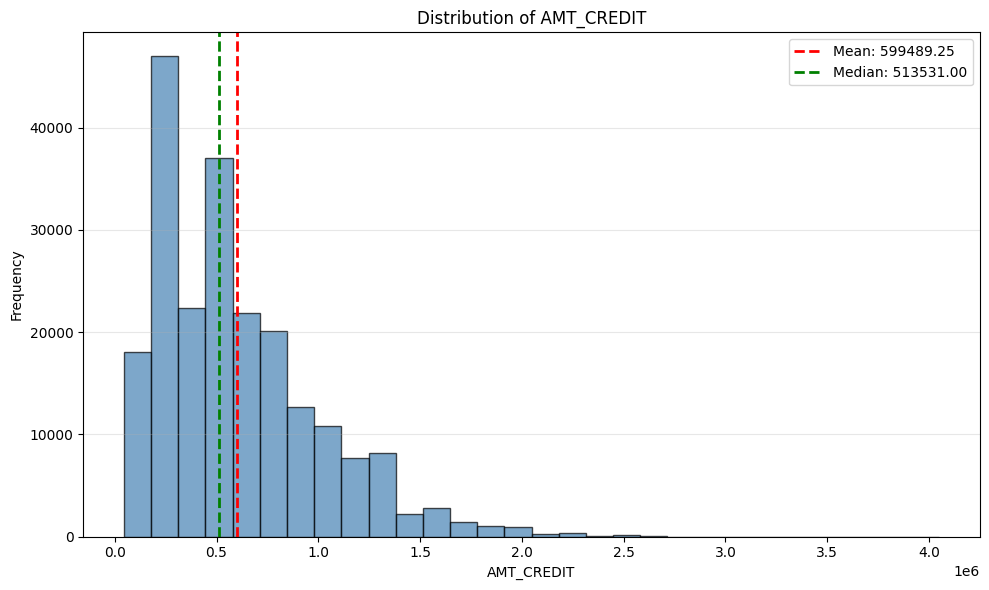

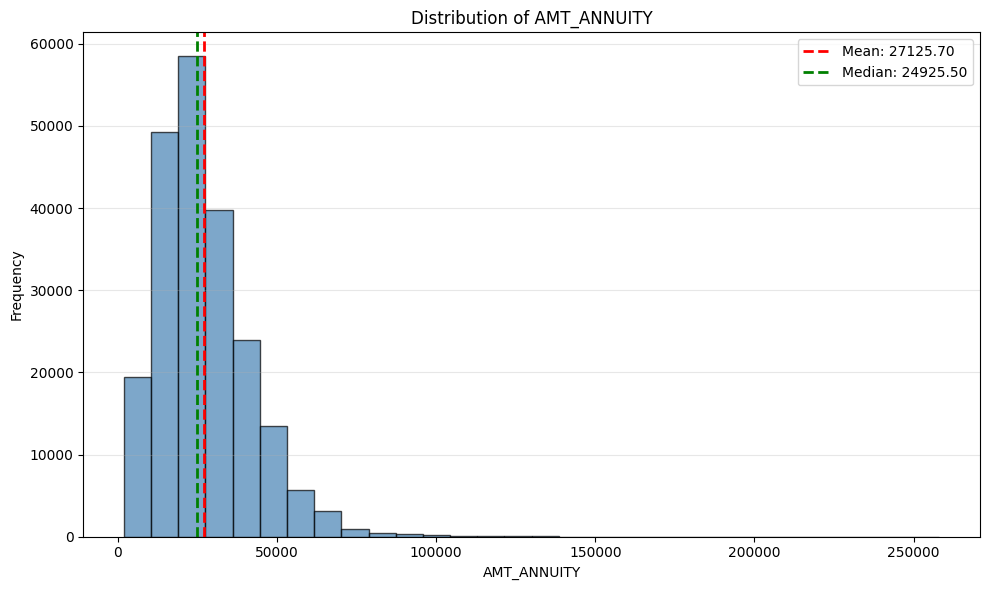

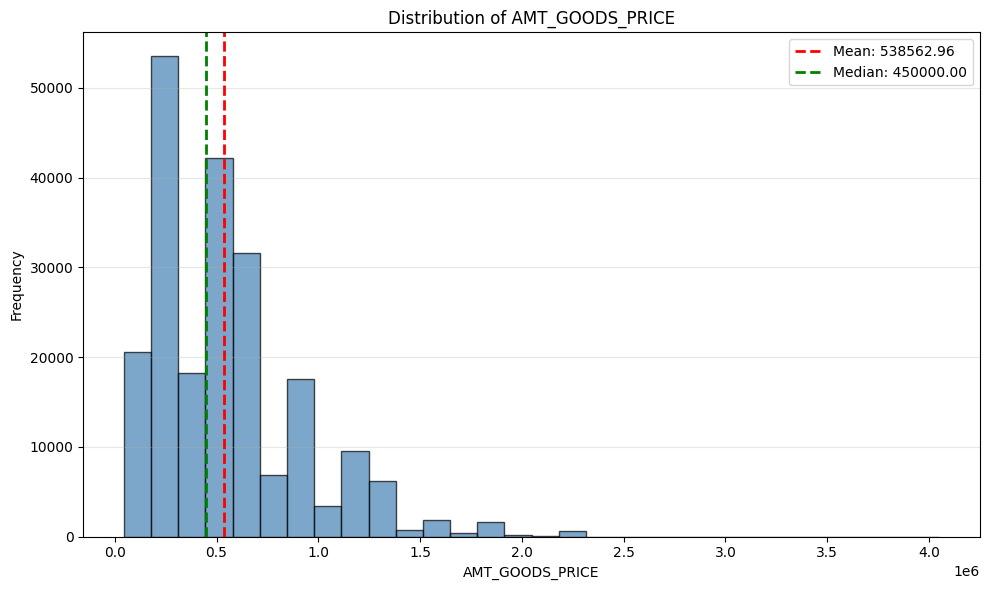

In [40]:
#DISTRIBUTION OF CONTINOUS NUMERICAL FEATURES 
num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

for col in num_cols:
    plot_continuous_histogram(df_prep[col], 
                              title=f"Distribution of {col}")


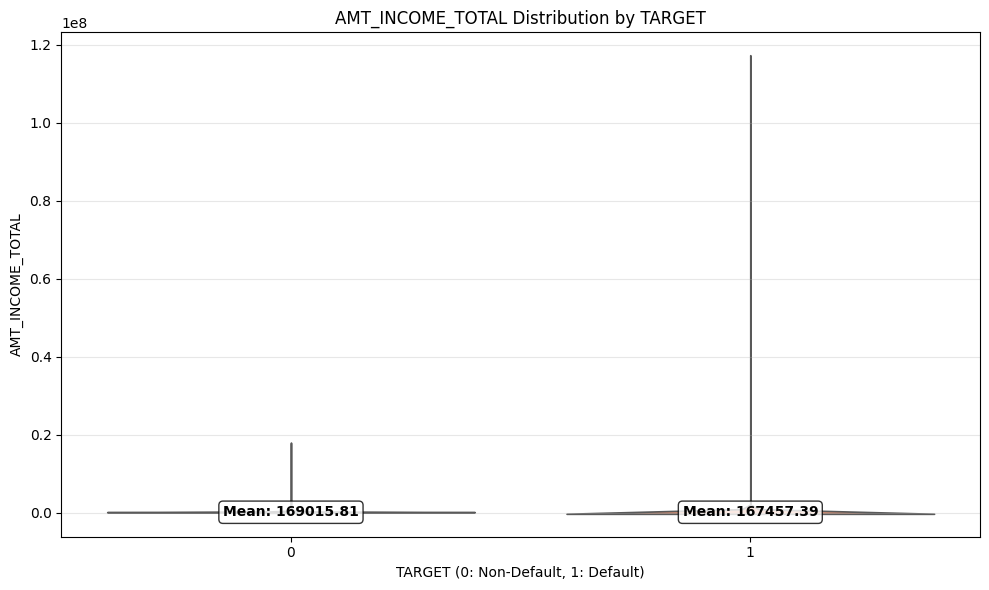

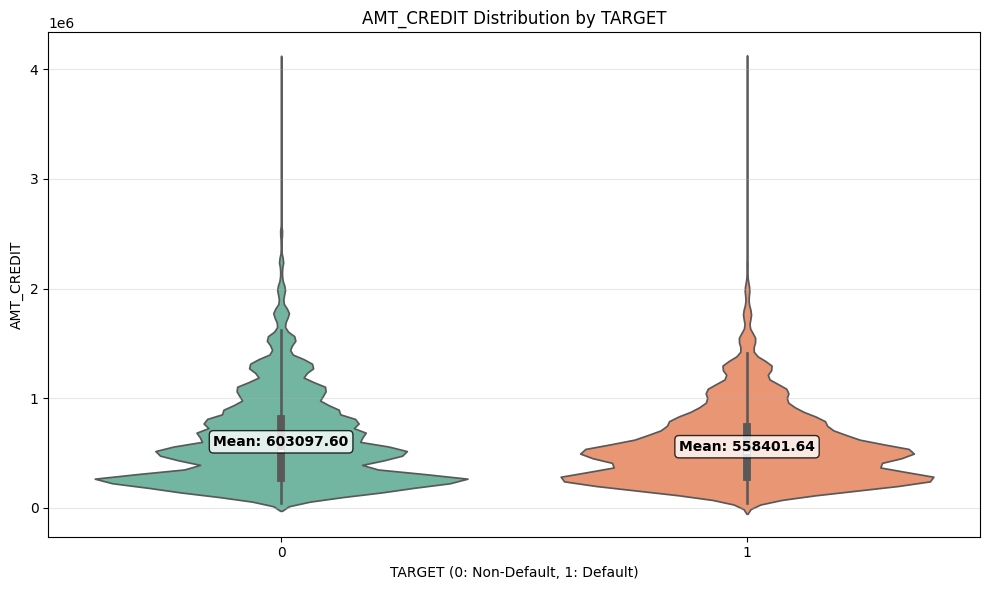

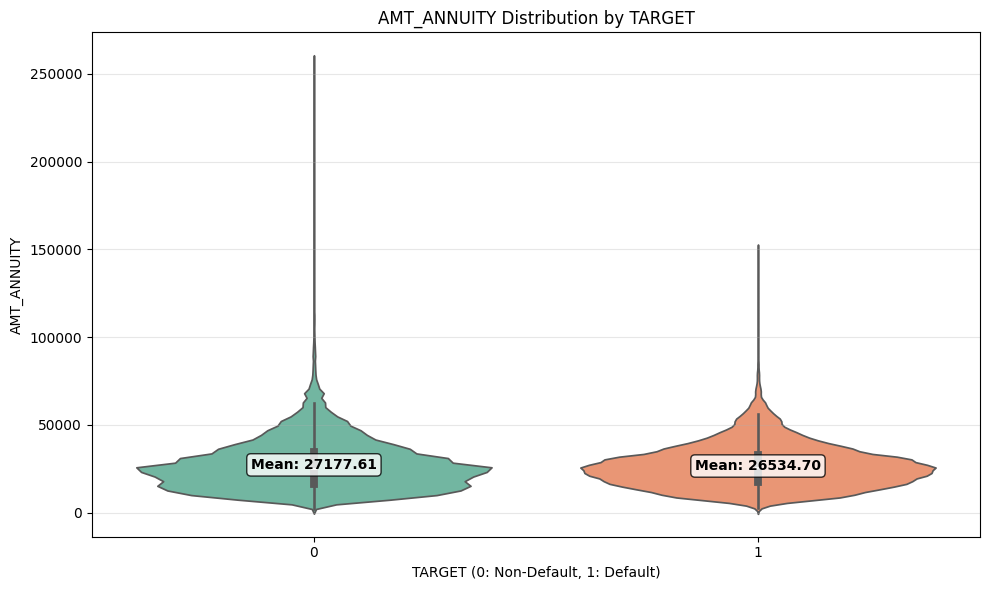

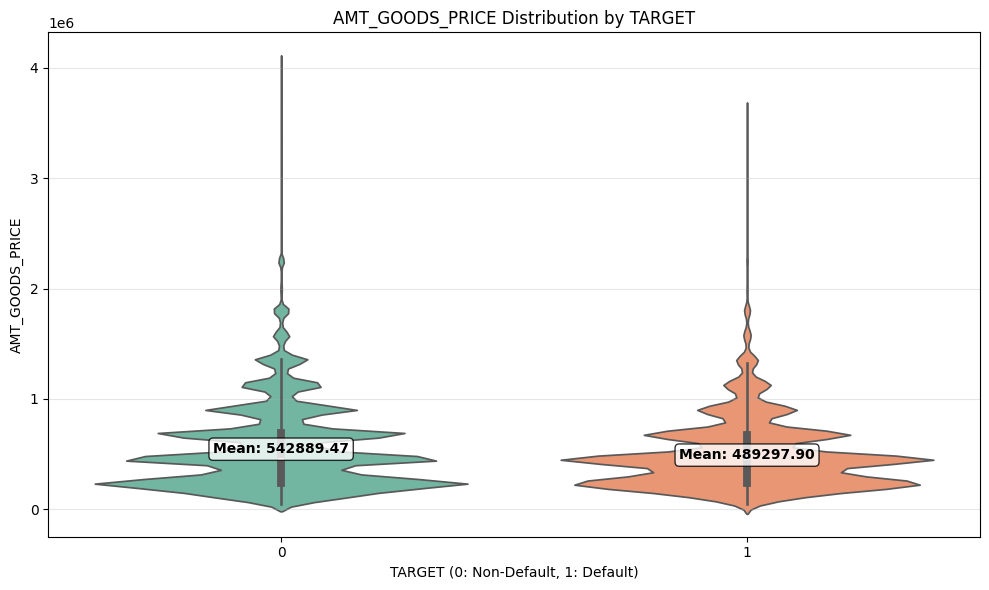

In [41]:
# DISTRIBUTION OF CONTINUOS NUMERICAL FEATURES VS TARGET
for col in num_cols:
    plot_continuous_violin_vs_target(df_prep,
                                    feature=col,     
                                    target='TARGET')


In [42]:
#METRICS CONTINUOUS VARIABLES VS TARGET
results3 = []  # lưu kết quả từng cột

for col in num_cols:
    df_metrics = calculate_continuous_metrics(df_prep[col], target=df_prep['TARGET'])
    results3.append(df_metrics)

# Gộp tất cả metrics lại thành 1 DataFrame
continuous_metrics_df = pd.concat(results3, ignore_index=True)
continuous_metrics_df

,Feature,Count,Missing,Mean,Median,Std,Min,Max,Skewness,Kurtosis,ANOVA_F_Statistic,ANOVA_P_Value
0,AMT_INCOME_TOTAL,215258,0,168889.994382,144000.0,274558.634675,25650.0,117000000.0,359.709190,152401.847230,0.514680,4.731205e-01
1,AMT_CREDIT,215258,0,599489.252871,513531.0,402779.828783,45000.0,4050000.0,1.229950,1.916856,196.896813,1.039401e-44
2,AMT_ANNUITY,215258,0,27125.704171,24925.5,14530.899689,1980.0,258025.5,1.607505,8.068369,31.276358,2.240588e-08
3,AMT_GOODS_PRICE,215258,0,538562.964141,450000.0,369768.846897,45000.0,4050000.0,1.348069,2.439615,336.085845,5.182870e-75


#### **`AMT_INCOME_TOTAL` :**

**Distribution:** Extremely right skewed (Skewness $\approx 9.7$) and dominated by middle/low income (Median $\approx 144k$). Contains many very high income outliers.

-> The dataset is dominated by low to middle income customers, but there is a small number of extremely high income customers that significantly skew the mean.

**Significance Risk:** Income does not discriminate well between defaulters (Mean $\approx 167k$) and non-defaulters (Mean $\approx 169k$).

**Predictive Power:** Not statistically significant (P-Value $\approx 0.473$) and has very weak predictive power.

**Model Impact:** 
* To take advantage of this variable, it is necessary to perform a logarithmic transformation and handle outliers to reduce bias. Otherwise, the models will have difficulty capturing any underlying linear relationships.

* This variable should be considered a supporting feature to provide context about the financial size of the customer, rather than the main variable to predict default.

#### **`AMT_CREDIT` :**

**Distribution:** Slightly right skewed, with the Median (513k) lower than the Mean (599k). 

-> The majority of loans are concentrated below 1,000,000 units, but the institution still issues a small number of very large loans, pushing up the average value.

**Significance Risk:** Larger loans have lower default rates (Non-Default Mean $\approx 603k$ vs Default Mean $\approx 558k$).

**Predictive Power:**  Very strong statistical significance (P-Value $\approx 10^{-44}$) and is a significant predictor 

-> The machine learning model will take advantage of an inverse relationship: the larger the loan, the lower the risk of default.

**Model Impact:** 
* It is mandatory to perform Logarithmic transformation (np.log1p) to reduce the bias and linearize the relationship with the target variable. This helps linear models to work more efficiently and stably.

* Logarithmic transformation also helps to control the influence of outliers (extremely large loans) on the model weights

#### **`AMT_ANNUITY` :**

**Distribution:** Highly right skewed (Skewness $\approx 1.6$)

-> Annual installments do have the potential to differentiate risk, although the differences are small on average. Customers with higher annual installments appear to have a lower default risk.

**Significance Risk:** Strong risk discrimination. Customers with higher installments tend to have lower default risk.

**Predictive Power:** 

Relevance and Statistical Significance (ANOVA):

* Very small P-Value: This indicates that the difference in annual installments between the two groups is very statistically significant.

This variable is a strong predictor and should be retained in the model.


**Model Impact:** 

* Similar to AMT_INCOME_TOTAL and AMT_CREDIT, this variable has a large skewness and outliers (Skewness $\approx 1.6$)

* A Logarithmic transformation (np.log1p) is needed to reduce the skewness and optimize the performance of the linear models.

* If you use Tree-based Models like XGBoost, LightGBM, Random Forest, it is acceptable to keep the Standard Scaling bias the same.

The AMT_ANNUITY variable is a product of the credit (AMT_CREDIT) and the repayment capacity. It should be analyzed together with derivative variables such as Debt-to-Income Ratio (DTI) or Installment Payment Ratio to get a better insight into the customer's actual repayment capacity.

#### **`AMT_GOODS_PRICE` :**

**Distribution:**

* Slightly imbalanced: The distribution is slightly right-skewed.

* Skewness ratio is 1.347: Confirms right-skewing, similar to AMT_CREDIT.

-> The majority of transactions are concentrated in the low to medium value range, but there are a small number of very large transactions. This variable has a distribution very similar to AMT_CREDIT (Credit Amount).

**Significance Risk:** The Non-Default group has a significantly higher average asset value than the Default group.

Similar to AMT_CREDIT, higher asset values ​​are associated with lower default risk. This is logical because higher value assets are often extended to better-off customers.

**Predictive Power:**

Relevance and Statistical Significance (ANOVA):

* Extremely small P-Value: This indicates that the difference in asset value between the two groups is very statistically significant.

This variable is a strong predictor and should be retained in the model.

**Model Impact:**

The variable AMT_GOODS_PRICE is highly correlated with AMT_CREDIT (Credit Amount) because the loan amount is often determined based on asset value. This overlap can cause multicollinearity.

Recommendation: Calculate the correlation coefficient between AMT_GOODS_PRICE and AMT_CREDIT. If the correlation is too high ($\rho > 0.9$), you should keep only one of the two variables or create a ratio variable from them (e.g. AMT_CREDIT / AMT_GOODS_PRICE).

Logarithmic transformation should be performed to reduce skewness and outliers, optimized for a linear model, or using StandardScaler according to your chosen method.

#### **3.2 Discrete variance**

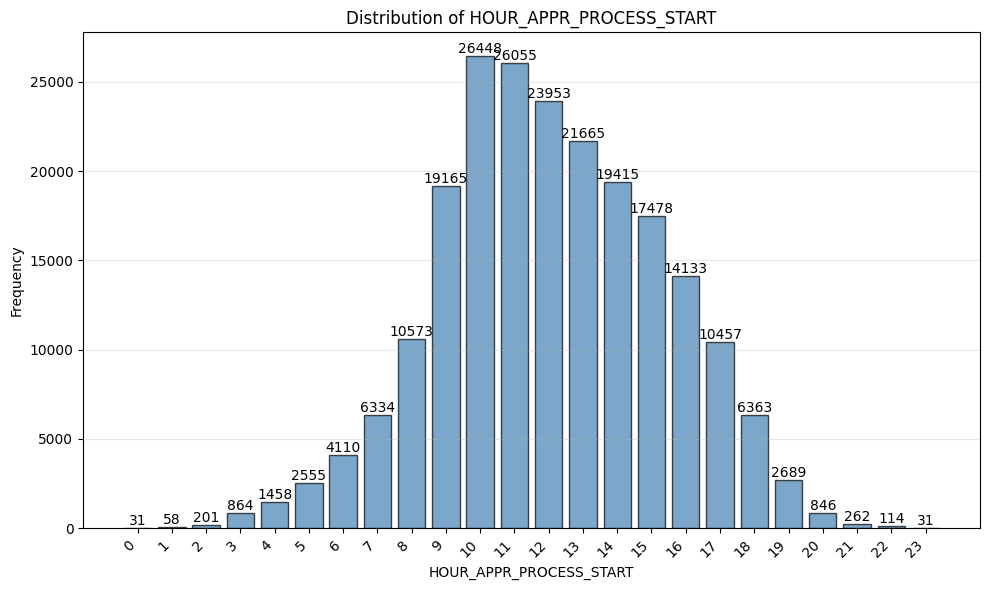

In [17]:
#DISTRIBUTION OF HOUR_APPR_PROCESS_START
plot_discrete_barchart(df_prep['HOUR_APPR_PROCESS_START'],
                       title = f"Distribution of HOUR_APPR_PROCESS_START")

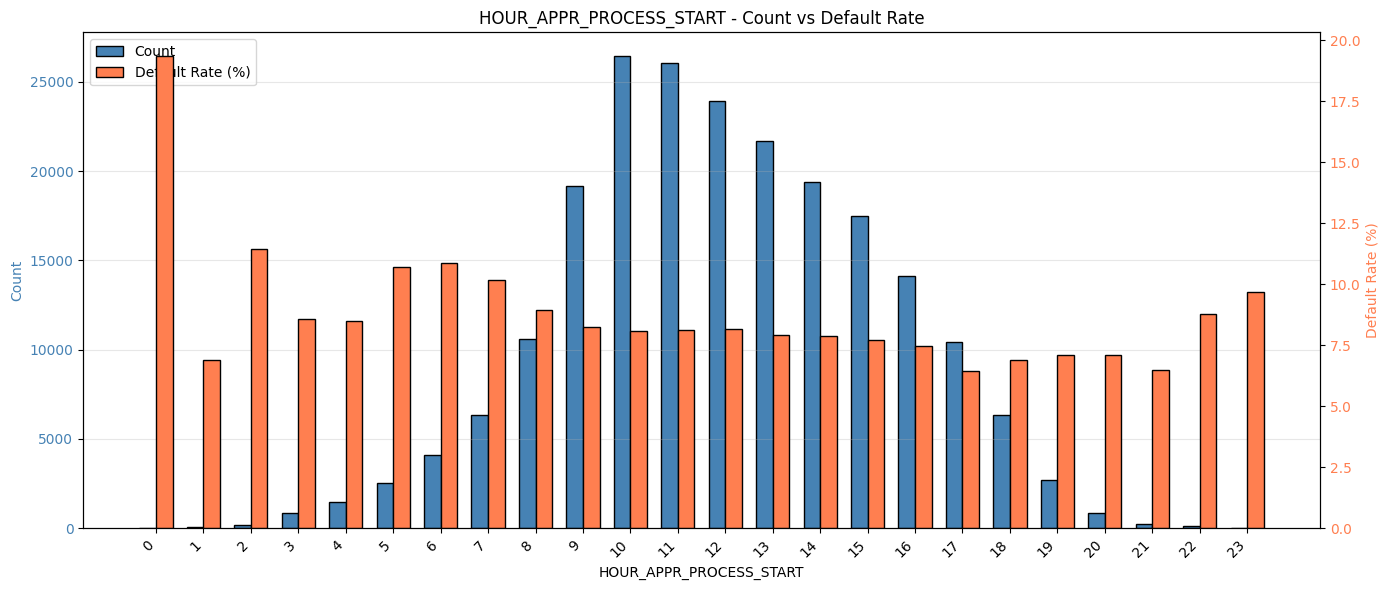

In [18]:
#DISTRIBUTION OF HOUR_APPR_PROCESS_START VS TARGET
plot_grouped_bar_vs_target(df_prep, 
                           feature='HOUR_APPR_PROCESS_START', 
                           target='TARGET')

In [19]:
#METRICS HOUR_APPR_PROCESS_START VS TARGET
results4 = []  # lưu kết quả từng cột   
df4_metrics = calculate_target_relationship_discrete_few_nunique(data=df_prep,
                                                                 feature='HOUR_APPR_PROCESS_START',
                                                                 target='TARGET'                            
)
results4.append(df4_metrics)
# Gộp lại thành 1 DataFrame
hour_appr_metrics_df = pd.concat(results4, ignore_index=True)
hour_appr_metrics_df


,Feature,Unique_Values,Chi2_Statistic,Chi2_P_Value,Cramers_V
0,HOUR_APPR_PROCESS_START,24,190.192106,2.790494e-28,0.029725


#### **`HOUR_APPR_PROCESS_START` :**

**Distribution:**

* Peak Hours: Application processing is heavily concentrated during business hours, peaking around 10 AM (26,448 applications) and 11 AM (26,055 applications).

* Declining Hours: The number of applications processed gradually decreases after 3 PM and drops sharply in the evening.

* Off-peak Hours: The lowest number of applications processed is at night, from 0 AM to 6 AM (only a few hundred to a few dozen applications).

=> Application processing is manual/semi-manual and mainly takes place during daytime working hours (8:00 AM to 5:00 PM), reflecting the activities of staff/systems during business hours.

**Significance Risk:**

* Extreme Risk at Night/Early Morning: Default rates (orange bars) spike between 0:00 AM and 5:00 AM (peaking above 17.5% at 0:00 AM).

* Low Risk Business Hours: During business hours (9:00 AM - 5:00 PM), default rates remain low and stable (approximately $\approx 8\%$ - $10\%$).

-> Although the number of applications processed at night is very small, these applications have a default rate twice as high as those processed during the day. This may be due to: * Rushing Customers: Customers who apply late at night have urgent financial needs or weak profiles. * Underwriting Process: The underwriting process at night may be less rigorous or automated, leading to higher risk.

**Predictive Power:**

Relevance and Statistical Significance:

* Extremely small P-Value: This variable is very statistically significant for default probability.

Weak Predictor (overall):

* Low Cramers' V: The overall relationship between processing hours and default is weak. This is because the large differences only occur at very low frequency hours.

**Model Impact:**

This variable should not be used in its raw form (24 categories).

Binning/Grouping is required to take advantage of clear risk insights:

* Group 1: Morning (6am-11am)

* Group 2: Afternoon (12pm-5pm)

* Group 3: Evening (6pm-11pm)

* Group 4: Late Night (High Risk Hours 0am-6am).

After clustering, the new variable will be a strong predictor and should be ordinal encoding and retained in the model.

### **`VALIDITY & CHECK INCONSISTENCIES`**

In [20]:
# Dictionary to store inconsistency check results
inconsistency_results = {}

# ============================================================================== 
# 1. IDENTIFIER AND TARGET VARIABLE CHECKS
# ============================================================================== 

# 1.1. ID (Uniqueness Check)
id_duplicates = df_prep['ID'].duplicated().sum()
inconsistency_results['ID_Duplicates'] = id_duplicates

# 1.2. TARGET (Binary Range Check)
target_inconsistencies = len(df_prep[~df_prep['TARGET'].isin([0, 1])])
inconsistency_results['TARGET_Invalid_Values'] = target_inconsistencies

# ============================================================================== 
# 2. NUMERICAL VARIABLE CHECKS (Sign and Range)
# ============================================================================== 

# 2.1. Check for Negative Values (Illogical)
for col in amount_cols:
    negative_count = len(df_prep[df_prep[col] < 0])
    inconsistency_results[f'{col}_Negative'] = negative_count

# 2.2. Check HOUR_APPR_PROCESS_START (Range 0-23)
hour_inconsistencies = len(df_prep[~df_prep['HOUR_APPR_PROCESS_START'].between(0, 23)])
inconsistency_results['HOUR_APPR_PROCESS_START_Invalid'] = hour_inconsistencies

# ============================================================================== 
# 3. CATEGORICAL VARIABLE CHECKS (NaN and Validity)
# ============================================================================== 

# 3.1. Check for NaN (Missing Values)
categorical_cols = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START']
for col in categorical_cols:
    nan_count = df_prep[col].isnull().sum()
    inconsistency_results[f'{col}_Missing_Values'] = nan_count

# 3.2. Check for Invalid Categorical Labels (e.g., typos in weekdays)
valid_weekdays = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
weekday_inconsistencies = len(df_prep[~df_prep['WEEKDAY_APPR_PROCESS_START'].isin(valid_weekdays) & df_prep['WEEKDAY_APPR_PROCESS_START'].notnull()])
inconsistency_results['WEEKDAY_APPR_PROCESS_START_Invalid_Labels'] = weekday_inconsistencies

# ============================================================================== 
# 4. RELATIONAL INCONSISTENCY CHECKS
# ============================================================================== 

# 4.1. Inconsistency 1: High Debt-to-Income Ratio (DTI)
df_prep['DTI_RATIO'] = df_prep['AMT_ANNUITY'] / df_prep['AMT_INCOME_TOTAL']
high_dti_inconsistencies = len(df_prep[df_prep['DTI_RATIO'] > 0.5])  # DTI > 50%
extreme_dti_inconsistencies = len(df_prep[df_prep['DTI_RATIO'] > 1.0])  # DTI > 100%
inconsistency_results['DTI_Above_50_Percent'] = high_dti_inconsistencies
inconsistency_results['DTI_Above_100_Percent'] = extreme_dti_inconsistencies

# 4.2. Inconsistency 2: Missing Goods Price when Credit is Granted
goods_price_missing_and_credit_present = len(df_prep[(df_prep['AMT_CREDIT'] > 0) & (df_prep['AMT_GOODS_PRICE'].isnull())])
inconsistency_results['AMT_GOODS_PRICE_Missing_When_Credit_Exists'] = goods_price_missing_and_credit_present

# ============================================================================== 
# PRINT RESULTS
# ============================================================================== 
print("\n" + "="*50)
print("VALIDITY CHECK INCONSISTENCIES SUMMARY")
print("="*50)

for check, count in inconsistency_results.items():
    if count > 0:
        print(f"🔴 {check:<50}: {count} records affected")
    else:
        print(f"✅ {check:<50}: {count} records affected")



VALIDITY CHECK INCONSISTENCIES SUMMARY
✅ ID_Duplicates                                     : 0 records affected
✅ TARGET_Invalid_Values                             : 0 records affected
✅ AMT_INCOME_TOTAL_Negative                         : 0 records affected
✅ AMT_CREDIT_Negative                               : 0 records affected
✅ AMT_ANNUITY_Negative                              : 0 records affected
✅ AMT_GOODS_PRICE_Negative                          : 0 records affected
✅ HOUR_APPR_PROCESS_START_Negative                  : 0 records affected
✅ HOUR_APPR_PROCESS_START_Invalid                   : 0 records affected
✅ NAME_CONTRACT_TYPE_Missing_Values                 : 0 records affected
🔴 NAME_TYPE_SUITE_Missing_Values                    : 882 records affected
✅ WEEKDAY_APPR_PROCESS_START_Missing_Values         : 0 records affected
✅ WEEKDAY_APPR_PROCESS_START_Invalid_Labels         : 0 records affected
🔴 DTI_Above_50_Percent                              : 1769 records affected
🔴 DTI_

### **`MULTIVARIATE ANALYSIS`**

Correlation Matrix - Heatmap

<Axes: >

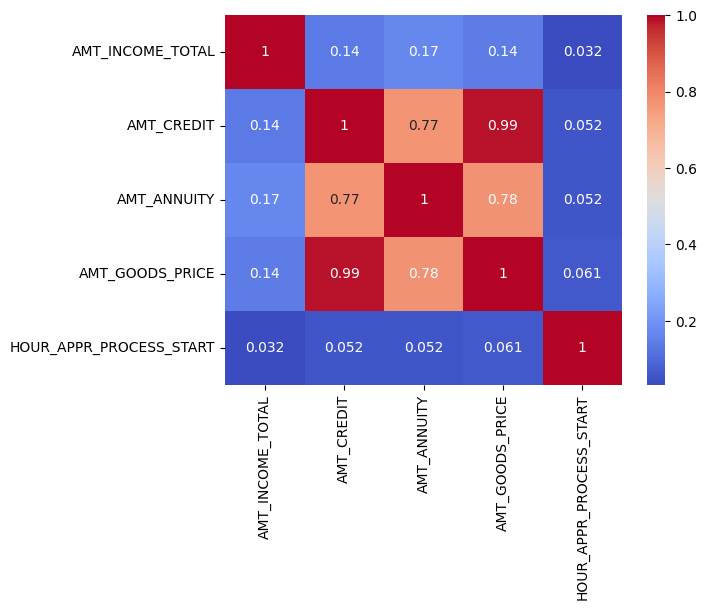

In [21]:
corr_matrix = df_prep[amount_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# **STEP 2: DATA PROCESSING**

### **A. DATA CLEANING**

In [22]:
sys.path.append(r'C:\Users\DELL\Data-Visualization\src')
from preprocess_v5 import *


#### **I. HANDLING MISSING VALUES**

In [23]:
# Missing count and percentage
missing_summary = pd.DataFrame({
    'missing_count': df_prep[cus_credit_cols].isnull().sum(),
    'missing_percent': df_prep[cus_credit_cols].isnull().mean() * 100
})
missing_summary

,missing_count,missing_percent
TARGET,0,0.000000
ID,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
NAME_TYPE_SUITE,882,0.409741
WEEKDAY_APPR_PROCESS_START,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,9,0.004181
AMT_GOODS_PRICE,174,0.080833
HOUR_APPR_PROCESS_START,0,0.000000


In [24]:
# NAME_TYPE_SUITE
df_prep['NAME_TYPE_SUITE'] = df_prep['NAME_TYPE_SUITE'].fillna('Unknown')
df_prep['NAME_TYPE_SUITE'] = df_prep['NAME_TYPE_SUITE'].astype('category')
        
# AMT_GOODS_PRICE
df_prep['GOODS_PRICE_WAS_MISSING'] = df_prep['AMT_GOODS_PRICE'].isnull().astype(float)
df_prep['AMT_GOODS_PRICE'] = df_prep['AMT_GOODS_PRICE'].fillna(df_prep['AMT_CREDIT'])
        
# AMT_ANNUITY
df_prep['AMT_ANNUITY_WAS_MISSING'] = df_prep['AMT_ANNUITY'].isnull().astype(float)
df_prep['AMT_ANNUITY'] = df_prep['AMT_ANNUITY'].fillna(df_prep['AMT_ANNUITY'].median())

In [25]:
df_prep.isnull().sum()

TARGET                        0
ID                            0
NAME_CONTRACT_TYPE            0
NAME_TYPE_SUITE               0
WEEKDAY_APPR_PROCESS_START    0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
HOUR_APPR_PROCESS_START       0
DTI_RATIO                     9
GOODS_PRICE_WAS_MISSING       0
AMT_ANNUITY_WAS_MISSING       0
dtype: int64

#### **II. HANDLING OUTLIERS**

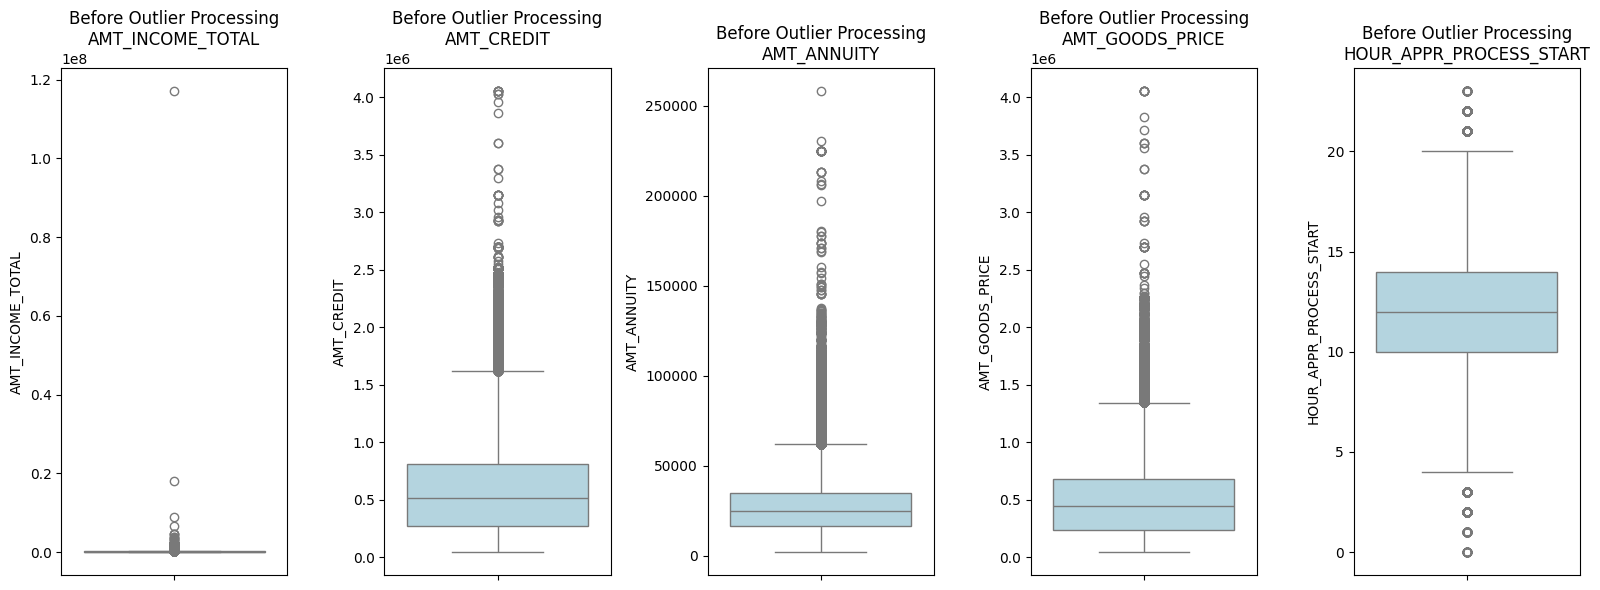

In [26]:
# Vẽ boxplot trước khi xử lý
plt.figure(figsize=(16, 6))
for i, col in enumerate(amount_cols):
    plt.subplot(1, len(amount_cols), i+1)
    sns.boxplot(y=df_prep[col], color='lightblue')
    plt.title(f'Before Outlier Processing\n{col}')
plt.tight_layout()
plt.show()

### `CHECK OUTLIER`

In [27]:
# Khởi tạo class
outlier_processor = AmountOutlierProcessor()

# Fit trên dataframe
outlier_processor.fit(df_prep)  # df_prep là dataframe bạn đang dùng

# Transform (thay thế giá trị outlier và tạo cột flag)
df_processed = outlier_processor.transform(df_prep)

# Kiểm tra kết quả
df_processed.head()

,TARGET,ID,NAME_CONTRACT_TYPE,NAME_TYPE_SUITE,WEEKDAY_APPR_PROCESS_START,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,DTI_RATIO,GOODS_PRICE_WAS_MISSING,AMT_ANNUITY_WAS_MISSING,AMT_INCOME_TOTAL_outlier,AMT_CREDIT_outlier,AMT_ANNUITY_outlier,AMT_GOODS_PRICE_outlier
0,0,196348,Cash loans,Unaccompanied,WEDNESDAY,225000.0,785398.5,33403.5,702000.0,11,0.148460,0.0,0.0,0,0,0,0
1,0,147976,Cash loans,Unaccompanied,WEDNESDAY,90000.0,592560.0,35937.0,450000.0,10,0.399300,0.0,0.0,0,0,0,0
2,0,52662,Revolving loans,Unaccompanied,MONDAY,126000.0,202500.0,10125.0,202500.0,13,0.080357,0.0,0.0,0,0,0,0
3,0,101577,Cash loans,Unaccompanied,TUESDAY,157500.0,254700.0,18531.0,225000.0,9,0.117657,0.0,0.0,0,0,0,0
4,0,173078,Cash loans,Unaccompanied,WEDNESDAY,540000.0,1252363.5,47830.5,1152000.0,19,0.088575,0.0,0.0,0,0,0,0


In [28]:
# Khởi tạo class
hour_binner = HourBinner()

# Fit và transform
df_binned = hour_binner.fit_transform(df_prep)

# Kiểm tra kết quả
df_binned[['HOUR_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_BIN']].head()

,HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_BIN
0,11,Morning
1,10,Morning
2,13,Afternoon
3,9,Morning
4,19,Evening


**ANALYSIS**

* Initially, the `HOUR_APPR_PROCESS_START` variable has 24 distinct values ​​(0–23). When binned into 4 groups (“Late_Night”, “Morning”, “Afternoon”, “Evening”), the number of categories is reduced to 4.
-> This makes the machine learning model easier to learn and reduces the clutter when visualizing the data.

* Hour groups help to observe trends by time frame, for example default rate by hour group(0-4h). With 24 individual values, trends can be difficult to see, but with 4 hour groups, the pattern becomes clearer.

* Rare hours (e.g. 0h or 23h) can create outliers or noise. Binning hours helps to group less frequent values ​​into a common group, reducing the impact on the model.

* The HOUR_APPR_PROCESS_BIN variable can be:

    * One-hot encoded for logistic regression or linear models.

    * Label encoded or directly categorized for tree-based models.
-> Thus, binning now reduces overfitting and preserves important information.

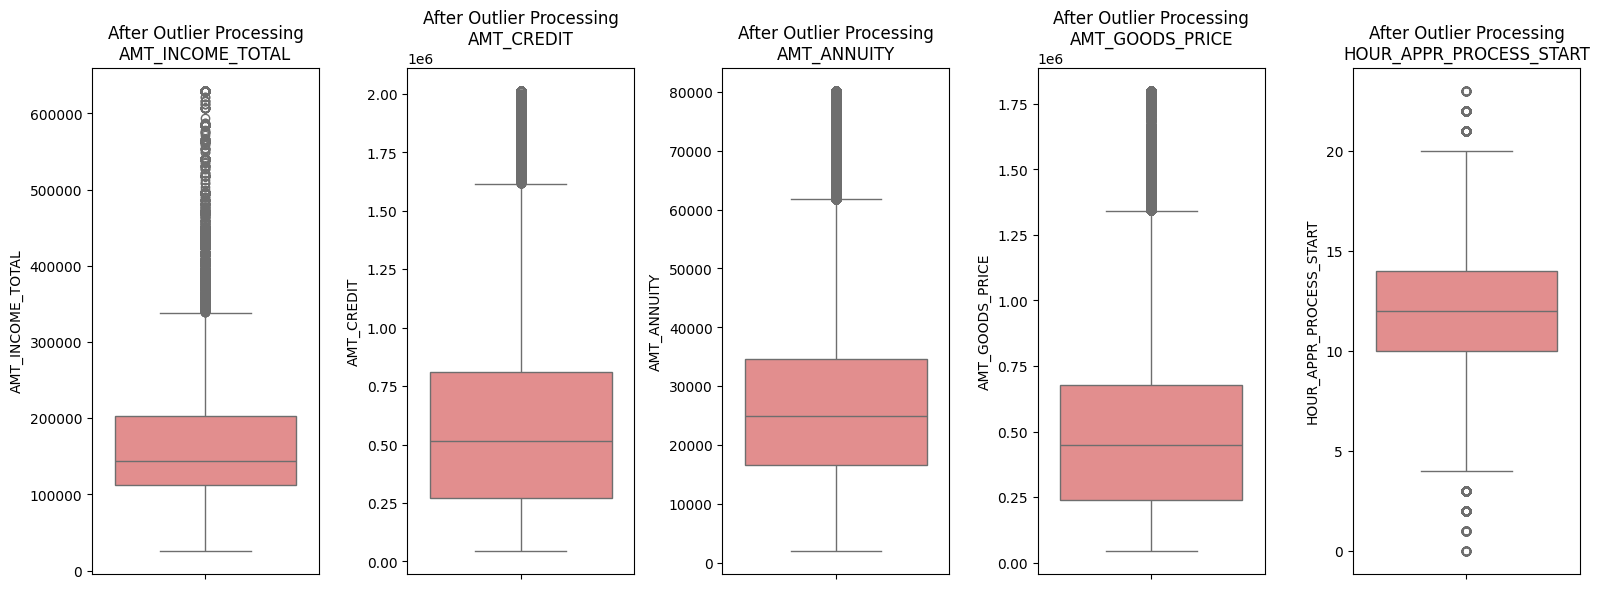

In [29]:
outlier_processor = AmountOutlierProcessor()
df_outlier = outlier_processor.fit_transform(df_prep.copy())

# Vẽ boxplot sau khi xử lý
plt.figure(figsize=(16, 6))
for i, col in enumerate(amount_cols):
    plt.subplot(1, len(amount_cols), i+1)
    sns.boxplot(y=df_outlier[col], color='lightcoral')
    plt.title(f'After Outlier Processing\n{col}')
plt.tight_layout()
plt.show()

**Nhận xét:**
* `AMT_INCOME_TOTAL`: có một số khách hàng siêu giàu(doanh nhân lớn)-> Outlier nằm rất xa-> Giữ lại các vị khách này vì thường là khách VIP, thường có tỉ lệ vỡ nợ thấp hơn
* `AMT_CREDIT`: khoản vay cực lớn, thường là mua nhà, xe sang hoặc doanh nghiệp nhỏ vay vốn
* `AMT_GOODS_PRICE`: tương tự AMT_CREADIT, nhưng outlier có nhiều hơn một chút do có vài trường hợp giá hàng hóa bị ghi nhầm hoặc thực sự đắt đỏ
* `HOUR_APPR_PROCESS_START`: giờ nộp hồ sơ bất thường(0h-4h sáng)-> Đây là hành vi đáng nghi liên quan đến hành vi gian lận

### **`HANDLING INCONSISTENCIES`**

In [30]:
# Dictionary to store inconsistency check results
inconsistency_results = {}

# ============================================================================== 
# 1. IDENTIFIER AND TARGET VARIABLE CHECKS
# ============================================================================== 

# 1.1. ID (Uniqueness Check)
id_duplicates = df_prep['ID'].duplicated().sum()
inconsistency_results['ID_Duplicates'] = id_duplicates

# 1.2. TARGET (Binary Range Check)
target_inconsistencies = len(df_prep[~df_prep['TARGET'].isin([0, 1])])
inconsistency_results['TARGET_Invalid_Values'] = target_inconsistencies

# ============================================================================== 
# 2. NUMERICAL VARIABLE CHECKS (Sign and Range)
# ============================================================================== 

# 2.1. Check for Negative Values (Illogical)
for col in amount_cols:
    negative_count = len(df_prep[df_prep[col] < 0])
    inconsistency_results[f'{col}_Negative'] = negative_count

# 2.2. Check HOUR_APPR_PROCESS_START (Range 0-23)
hour_inconsistencies = len(df_prep[~df_prep['HOUR_APPR_PROCESS_START'].between(0, 23)])
inconsistency_results['HOUR_APPR_PROCESS_START_Invalid'] = hour_inconsistencies

# ============================================================================== 
# 3. CATEGORICAL VARIABLE CHECKS (NaN and Validity)
# ============================================================================== 

# 3.1. Check for NaN (Missing Values)
categorical_cols = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START']
for col in categorical_cols:
    nan_count = df_prep[col].isnull().sum()
    inconsistency_results[f'{col}_Missing_Values'] = nan_count

# 3.2. Check for Invalid Categorical Labels (e.g., typos in weekdays)
valid_weekdays = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
weekday_inconsistencies = len(df_prep[~df_prep['WEEKDAY_APPR_PROCESS_START'].isin(valid_weekdays) & df_prep['WEEKDAY_APPR_PROCESS_START'].notnull()])
inconsistency_results['WEEKDAY_APPR_PROCESS_START_Invalid_Labels'] = weekday_inconsistencies

# ============================================================================== 
# 4. RELATIONAL INCONSISTENCY CHECKS
# ============================================================================== 

# 4.1. Inconsistency 1: High Debt-to-Income Ratio (DTI)
df_prep['DTI_RATIO'] = df_prep['AMT_ANNUITY'] / df_prep['AMT_INCOME_TOTAL']
high_dti_inconsistencies = len(df_prep[df_prep['DTI_RATIO'] > 0.5])  # DTI > 50%
extreme_dti_inconsistencies = len(df_prep[df_prep['DTI_RATIO'] > 1.0])  # DTI > 100%
inconsistency_results['DTI_Above_50_Percent'] = high_dti_inconsistencies
inconsistency_results['DTI_Above_100_Percent'] = extreme_dti_inconsistencies

# 4.2. Inconsistency 2: Missing Goods Price when Credit is Granted
goods_price_missing_and_credit_present = len(df_prep[(df_prep['AMT_CREDIT'] > 0) & (df_prep['AMT_GOODS_PRICE'].isnull())])
inconsistency_results['AMT_GOODS_PRICE_Missing_When_Credit_Exists'] = goods_price_missing_and_credit_present

# ============================================================================== 
# PRINT RESULTS
# ============================================================================== 
print("\n" + "="*50)
print("VALIDITY CHECK INCONSISTENCIES SUMMARY")
print("="*50)

for check, count in inconsistency_results.items():
    if count > 0:
        print(f"🔴 {check:<50}: {count} records affected")
    else:
        print(f"✅ {check:<50}: {count} records affected")



VALIDITY CHECK INCONSISTENCIES SUMMARY
✅ ID_Duplicates                                     : 0 records affected
✅ TARGET_Invalid_Values                             : 0 records affected
✅ AMT_INCOME_TOTAL_Negative                         : 0 records affected
✅ AMT_CREDIT_Negative                               : 0 records affected
✅ AMT_ANNUITY_Negative                              : 0 records affected
✅ AMT_GOODS_PRICE_Negative                          : 0 records affected
✅ HOUR_APPR_PROCESS_START_Negative                  : 0 records affected
✅ HOUR_APPR_PROCESS_START_Invalid                   : 0 records affected
✅ NAME_CONTRACT_TYPE_Missing_Values                 : 0 records affected
✅ NAME_TYPE_SUITE_Missing_Values                    : 0 records affected
✅ WEEKDAY_APPR_PROCESS_START_Missing_Values         : 0 records affected
✅ WEEKDAY_APPR_PROCESS_START_Invalid_Labels         : 0 records affected
🔴 DTI_Above_50_Percent                              : 1769 records affected
🔴 DTI_Ab

### **B.  DATA TRANSFORMATION**

### **ENCONDING**

In [ ]:
# 1. Định nghĩa các danh mục thiểu số và nhãn mới
rare_categories = [
    'Children',
    'Group of people',
    'Other_A',
    'Other_B',
    'Spouse, partner'
]
rare_label = 'RARE_SUITE'

if pd.api.types.is_categorical_dtype(df_prep['NAME_TYPE_SUITE']):
    # Thêm danh mục mới 'RARE_SUITE' vào danh sách các category của cột
    if rare_label not in df_prep['NAME_TYPE_SUITE'].cat.categories:
        df_prep['NAME_TYPE_SUITE'] = df_prep['NAME_TYPE_SUITE'].cat.add_categories(rare_label)

# 2. Xử lý các giá trị thiếu (NaN)
# Gán NaN vào nhóm RARE_SUITE (hoặc xử lý NaN trước nếu cần)
# Lỗi TypeError ban đầu xảy ra ở đây do fillna cố gắng thêm category mới
df_prep['NAME_TYPE_SUITE'] = df_prep['NAME_TYPE_SUITE'].fillna(rare_label) 

# 3. Thực hiện Binning (Gộp nhóm)
# Thay thế tất cả các giá trị thuộc rare_categories bằng rare_label
# Lỗi TypeError cũng có thể xảy ra ở đây nếu chưa add_categories
df_prep.loc[df_prep['NAME_TYPE_SUITE'].isin(rare_categories), 'NAME_TYPE_SUITE'] = rare_label

# 4. (Tùy chọn) Xóa các danh mục cũ không còn được sử dụng để tiết kiệm bộ nhớ
df_prep['NAME_TYPE_SUITE'] = df_prep['NAME_TYPE_SUITE'].cat.remove_unused_categories()

# Kiểm tra kết quả
print("Các danh mục duy nhất của 'NAME_TYPE_SUITE' sau khi gộp nhóm và xử lý:")
print(df_prep['NAME_TYPE_SUITE'].unique())
print("\nPhân phối tần suất mới:")
print(df_prep['NAME_TYPE_SUITE'].value_counts())

Các danh mục duy nhất của 'NAME_TYPE_SUITE' sau khi gộp nhóm và xử lý:
['Unaccompanied', 'RARE_SUITE', 'Family', 'Unknown']
Categories (4, object): ['Family', 'Unaccompanied', 'Unknown', 'RARE_SUITE']

Phân phối tần suất mới:
NAME_TYPE_SUITE
Unaccompanied    173985
Family            28107
RARE_SUITE        12284
Unknown             882
Name: count, dtype: int64


In [ ]:
# 1. Đảm bảo DataFrame df_prep đã được Binning
# (Đoạn code gộp nhóm đã chạy thành công trên df_prep)


encoder = FlexibleCategoricalEncoder(
    onehot_encode_cols=['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE'],
    onehot_drop='first', 
    handle_unknown='ignore' 
)

df_encoded = encoder.fit_transform(df_prep.copy())

# Kiểm tra các cột mới. Giờ đây, bạn sẽ chỉ thấy các cột cho:
# 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_RARE_SUITE', v.v.
print("Các cột mới được tạo sau One-Hot Encoding:")
print([col for col in df_encoded.columns if 'NAME_CONTRACT_TYPE_' in col or 'NAME_TYPE_SUITE_' in col])

One-hot encoding: NAME_CONTRACT_TYPE (2 categories)
One-hot encoding: NAME_TYPE_SUITE (4 categories)
Các cột mới được tạo sau One-Hot Encoding:
['NAME_CONTRACT_TYPE_Revolving loans', 'NAME_TYPE_SUITE_RARE_SUITE', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_TYPE_SUITE_Unknown']


Applying One-Hot Encoding (OHE) to these portfolio variables is a necessary standardization step to convert the contract types and associated states into a numeric format that the machine learning model can process.

* For `NAME_CONTRACT_TYPE`, OHE allows the model to assign a positive risk weight to Revolving loans relative to the underlying Cash loans, thereby adjusting for the increased default probability for this product type. More importantly

-> Lenders should look more closely at Revolving Loan applications, as they are inherently riskier (perhaps due to lack of collateral or easier access).

* For `NAME_TYPE_SUITE` (which was previously grouped), OHE creates binary columns for important risk groups such as Family and RARE_SUITE. This allows the model to assign independent coefficients to each group relative to the Unaccompanied base group, thereby accurately capturing non-linear risk differences between customer groups, ensuring that each risk group is assessed separately and consistently.

-> It is important to monitor applications from the Family group and especially the RARE_SUITE group (including rare groups and missing values) as these groups do not follow the normal pattern.

In [ ]:
df_transformed = df_prep.copy()
df_transformed['AMT_CREDIT_LOG'] = np.log1p(df_transformed['AMT_CREDIT'])
df_transformed['AMT_INCOME_TOTAL_LOG'] = np.log1p(df_transformed['AMT_INCOME_TOTAL'])

Applying Logarithmic Transformation (np.log1p) to the monetary variables `AMT_CREDIT` and `AMT_INCOME_TOTAL` is an essential preprocessing step as both variables have a severely right-skewed distribution (Skewness). The main goal is to reduce the skewness and control the influence of outliers (especially for AMT_INCOME_TOTAL which has a very high skewness), bringing their distribution closer to normality.

For machine learning models, this enhances the stability and improves the predictive performance of linear models (such as Logistic Regression), which are sensitive to skewed distributions.

In terms of practical insight, the transformation allows the model to no longer focus on the absolute (linear) difference of monetary values. Instead, the model focuses on the magnitude or percentage change (logarithmic scale) of credit and income, which more fairly and effectively assesses the differences between customer financial segments.

In [33]:
from sklearn.preprocessing import StandardScaler

# Copy dataframe để giữ df_prep gốc
df_scaled = df_prep.copy()

# Các cột muốn scale
cols_to_scale = ['AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Fit và transform
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

# Kiểm tra kết quả
df_scaled[cols_to_scale].head()


,AMT_ANNUITY,AMT_GOODS_PRICE
0,0.432032,0.441999
1,0.606385,-0.239510
2,-1.169972,-0.908848
3,-0.591479,-0.847999
4,1.424884,1.658978


Applying StandardScaler to `AMT_ANNUITY` and `AMT_GOODS_PRICE` is a basic and necessary normalization step to bring both variables with large absolute values ​​to the same scale (Mean $\approx 0$, StdDev $\approx 1$). This is important for machine learning models because it prevents these two variables from having an undue influence on the results simply because of their large scale, especially for linear models with Regularization or distance-based algorithms. 

However, it should be noted that Standard Scaling does not correct the residual right skewness in the distribution of both variables. 

Therefore, if you use a linear model, this residual skewness can limit performance and reduce the stability of the coefficients compared to using Log Transformation earlier.

In [34]:
# Copy dataframe nếu cần
df_weekday = df_prep.copy()

# Chuyển tên thứ sang số 0-6
weekday_map = {
    'MONDAY': 0, 'TUESDAY': 1, 'WEDNESDAY': 2, 'THURSDAY': 3,
    'FRIDAY': 4, 'SATURDAY': 5, 'SUNDAY': 6
}
df_weekday['WEEKDAY_NUM'] = df_weekday['WEEKDAY_APPR_PROCESS_START'].map(weekday_map)

# Cyclic encoding
df_weekday['WEEKDAY_SIN'] = np.sin(2 * np.pi * df_weekday['WEEKDAY_NUM'] / 7)
df_weekday['WEEKDAY_COS'] = np.cos(2 * np.pi * df_weekday['WEEKDAY_NUM'] / 7)

df_weekday = df_weekday.drop(columns=['WEEKDAY_APPR_PROCESS_START','WEEKDAY_NUM'])

df_weekday[['WEEKDAY_SIN','WEEKDAY_COS']].head()

,WEEKDAY_SIN,WEEKDAY_COS
0,0.974928,-0.222521
1,0.974928,-0.222521
2,0.000000,1.000000
3,0.781831,0.623490
4,0.974928,-0.222521


Applying Cyclic Encoding, which uses the $\sin$ and $\cos$ functions to create two columns `WEEKDAY_SIN and WEEKDAY_COS`, is the best way to handle the `WEEKDAY_APPR_PROCESS_START` variable because it accurately accounts for the cyclical nature of the data. 

This approach overcomes the limitations of both OHE (which creates multiple columns) and Hierarchical Encoding (which creates a false gap between Sunday and Monday), by mapping the days of the week onto a circle, ensuring that the last day of the week and the first day are placed close together.

This helps the linear model understand the recurring weekly pattern of filing risk/behavior, allowing it to capitalize on any small differences in risk between days in the most accurate and efficient way, by adding just two features to the model.

In [ ]:
# 1. Thực hiện One-Hot Encoding cho biến đã được chia nhóm
# Tham số drop_first=True được sử dụng để loại bỏ một cột (tránh đa cộng tuyến)
df_ohe_hour = pd.get_dummies(
    df_binned['HOUR_APPR_PROCESS_BIN'], 
    prefix='HOUR_BIN', 
    drop_first=True
)

# 2. Thêm các cột OHE mới vào DataFrame gốc
# Lưu ý: Cần đảm bảo df_binned không còn cột 'HOUR_APPR_PROCESS_BIN' gốc nếu bạn không muốn giữ nó.
df_binned = pd.concat([df_binned, df_ohe_hour], axis=1)

# 3. (Tùy chọn) Loại bỏ cột đã được mã hóa
df_binned = df_binned.drop(columns=['HOUR_APPR_PROCESS_BIN', 'HOUR_BIN_ORD'])

print("Các cột mới được tạo sau One-Hot Encoding:")
print([col for col in df_binned.columns if 'HOUR_BIN_' in col])
df_binned[['HOUR_APPR_PROCESS_START'] + [col for col in df_binned.columns if 'HOUR_BIN_' in col]].head()

Các cột mới được tạo sau One-Hot Encoding:
['HOUR_BIN_Evening', 'HOUR_BIN_Late_Night', 'HOUR_BIN_Morning']


,HOUR_APPR_PROCESS_START,HOUR_BIN_Evening,HOUR_BIN_Late_Night,HOUR_BIN_Morning
0,11,False,False,True
1,10,False,False,True
2,13,False,False,False
3,9,False,False,True
4,19,True,False,False


Applying One-Hot Encoding (OHE) to the `HOUR_APPR_PROCESS_BIN` variable is an optimal way to take advantage of the risk insight stratified by application processing time. 

The most important practical insight is the non-linear risk differentiation: Default rates spike in the Late Night group and drop sharply in the Morning/Afternoon group. 

The impact on the model is that OHE creates independent binary columns, allowing the linear model to assign separate and precise weights to each group (e.g., a large positive weight for Late Night and a weight close to zero for Morning). 

This addresses the biggest problem with Hierarchical Encoding, which is the assumption of equal risk spacing, allowing the model to differentiate extreme risks more effectively, ensuring that the increased risk of an application processed at night is fully and accurately captured by the model.